In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# File to Load (Remember to Change These)
traffic_file = "project_data.csv"

speed_file = "speed_data.csv"

# Read Purchasing File and store into Pandas data frame
traffic_df = pd.read_csv(traffic_file)
speed_df = pd.read_csv(speed_file)

# remove unwanted rows 

speed_df=speed_df.loc[speed_df['SPEED_LIMIT']!="50km/h applies in built up areas or 110km/h outside built up areas"]
speed_df=speed_df.drop_duplicates(["ROAD_NO"])


# converting date column to date month year 

traffic_df[["day", "month", "year"]] = traffic_df["CRASH_DATE"].str.split("/", expand = True)

merge_df = pd.merge(traffic_df, speed_df, on="ROAD_NO")


# Create a df which are just incidents with fatal, hospital and medical 

incident_df = traffic_df.loc[traffic_df['SEVERITY']!="PDO Minor"]
incident_df = incident_df.loc[incident_df['SEVERITY']!="PDO Major"]

merge_2_df = pd.merge(incident_df, speed_df, on="ROAD_NO")


In [2]:
#speed_df["SPEED_LIMIT"].value_counts()

merge_2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21333 entries, 0 to 21332
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ACC_ID                         21333 non-null  int64  
 1   ROAD_NO                        21333 non-null  object 
 2   ROAD_NAME_x                    21333 non-null  object 
 3   LONGITUDE                      21333 non-null  float64
 4   LATITUDE                       21333 non-null  float64
 5   CRASH_DATE                     21333 non-null  object 
 6   CRASH_TIME                     21241 non-null  float64
 7   SEVERITY                       21333 non-null  object 
 8   EVENT_NATURE                   21007 non-null  object 
 9   EVENT_TYPE                     2804 non-null   object 
 10  TOTAL_BIKE_INVOLVED            21333 non-null  int64  
 11  TOTAL_TRUCK_INVOLVED           21333 non-null  int64  
 12  TOTAL_HEAVY_TRUCK_INVOLVED     21333 non-null 

In [3]:
#SORTING OUT DATA FRAME 


merge_3_df = merge_2_df[["OBJECTID", "day", "month", "year", "CRASH_TIME", "SEVERITY", "COMMON_USAGE_NAME", "RA_NAME", "LG_NAME", "SPEED_LIMIT"]]

merge_3_df.head()

merge_3_df = merge_3_df.rename(columns={"COMMON_USAGE_NAME": "Road",
                                            "LG_NAME": "Suburb", 
                                            "RA_NAME": "Region",
                                            "SPEED_LIMIT": "Speed",
                                            "CRASH_TIME": "Crash time",
                                            "OBJECTID": "Incident",
                                            "SEVERITY": "Severity"})


merge_3_df["Severity"].value_counts()

merge_3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21333 entries, 0 to 21332
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Incident    21333 non-null  int64  
 1   day         21333 non-null  object 
 2   month       21333 non-null  object 
 3   year        21333 non-null  object 
 4   Crash time  21241 non-null  float64
 5   Severity    21333 non-null  object 
 6   Road        21333 non-null  object 
 7   Region      21333 non-null  object 
 8   Suburb      21333 non-null  object 
 9   Speed       21333 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.8+ MB


<AxesSubplot:title={'center':'Traffic Incidents per Year'}, ylabel='Traffic Incidents'>

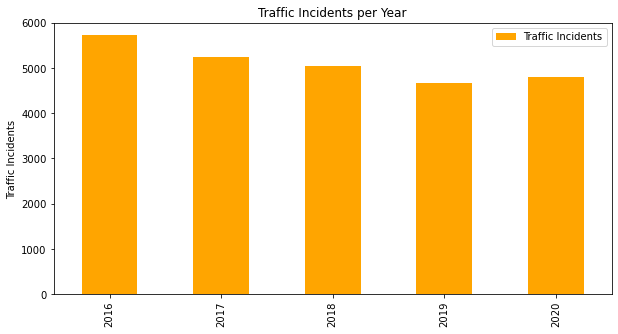

In [4]:
#graphing without PDOs

incident_df['year'].replace({"16":"2016","17": "2017", "18": "2018", "19": "2019", "20": "2020"}, inplace=True)

incident_year = incident_df["year"].value_counts()

incident_2_df = pd.DataFrame({"Traffic Incidents": incident_year})

#rearrange so year is 2016 to 2020 
incident_2_df = incident_2_df.sort_index(ascending=True)

# graphing 

pandas_plot = incident_2_df.plot.bar(figsize=(10,5), color="orange",fontsize = 10)
plt.ylabel("Traffic Incidents")
plt.title("Traffic Incidents per Year")

pandas_plot

<AxesSubplot:title={'center':'Traffic Incidents at Hourly Intervals'}, ylabel='Traffic Incidents'>

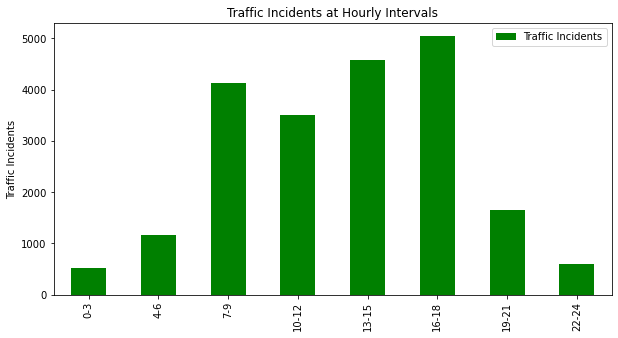

In [12]:
 # Patterns of accident by day/night # use bin function to separate in 3 hour intervals for non PDO data

time_bins = [0, 359, 659, 959, 1259, 1559, 1859, 2159, 2359]
time_names = ["0-3", "4-6", "7-9", "10-12", "13-15", "16-18", "19-21", "22-24"]

group_2_time_df = merge_3_df
group_2_time_df["Time Interval"] = pd.cut(group_2_time_df["Crash time"],time_bins, labels=time_names)
group_2_time_df

group_2_time_df["Time Interval"].count()

time_2_df = group_2_time_df.groupby("Time Interval")
time_2_df.count()

time_2_incident = time_2_df["Incident"].count()

time_3_incident_df = pd.DataFrame({"Traffic Incidents": time_2_incident})

time_3_incident_df

pandas_plot = time_3_incident_df.plot.bar(figsize=(10,5), color="green",fontsize = 10)
plt.xlabel("")
plt.ylabel("Traffic Incidents")
plt.title("Traffic Incidents at Hourly Intervals")

pandas_plot

In [13]:
merge_3_df["Region"].value_counts()

Metropolitan              16260
South West                 1343
Wheatbelt                  1227
Goldfields - Esperance      924
Great Southern              607
Mid West-Gascoyne           409
Kimberley                   395
Pilbara                     168
Name: Region, dtype: int64

In [9]:
#suburb >> severity // lat/long scatter data for population 

#trying by metro 

merge_3_df["Region"].value_counts()

metro_2_df = merge_3_df.loc[merge_3_df['Region']!="South West"]
metro_3_df = metro_2_df.loc[merge_3_df['Region']!="Great Southern"]
metro_4_df = metro_3_df.loc[merge_3_df['Region']!="Mid West-Gascoyne"]
metro_5_df = metro_4_df.loc[merge_3_df['Region']!="Goldfields - Esperance"]
metro_6_df = metro_5_df.loc[merge_3_df['Region']!="Kimberley"]
metro_7_df = metro_6_df.loc[merge_3_df['Region']!="Pilbara"]
metro_8_df = metro_7_df.loc[merge_3_df['Region']!="Wheatbelt"]

metro_8_df['Suburb'].value_counts()

# separate by severity 

# north/south 
# bar/graph 


Stirling (C)               2457
Swan (C)                   1752
Cockburn (C)               1273
Vincent (C)                1161
Wanneroo (C)                998
Perth (C)                   896
South Perth (C)             895
Fremantle (C)               890
Gosnells (C)                618
Joondalup (C)               618
Kalamunda                   572
Serpentine - Jarrahdale     559
Melville (C)                551
Canning (C)                 469
Rockingham (C)              464
Bayswater (C)               458
Armadale (C)                270
Nedlands (C)                231
Victoria Park (T)           231
Cambridge (T)               222
Kwinana (C)                 209
Belmont (C)                 163
Mundaring                    99
Subiaco (C)                  84
Bassendean (T)               55
Claremont (T)                30
Cottesloe (T)                11
East Fremantle (T)            9
Kings Park                    6
Murray                        5
Rottnest                      4
Name: Su

In [16]:
severe_metro_df = metro_8_df.groupby(['Severity'])
severe_metro_df = severe_metro_df["Suburb"].value_counts()

severe_metro_df["Hospital"]
severe_metro_df["Fatal"]
severe_metro_df["Medical"]



Suburb
Stirling (C)               1952
Swan (C)                   1352
Cockburn (C)                982
Vincent (C)                 924
Wanneroo (C)                761
Fremantle (C)               724
Perth (C)                   706
South Perth (C)             694
Joondalup (C)               509
Gosnells (C)                501
Melville (C)                440
Kalamunda                   407
Serpentine - Jarrahdale     382
Canning (C)                 356
Bayswater (C)               350
Rockingham (C)              319
Armadale (C)                186
Nedlands (C)                179
Cambridge (T)               176
Victoria Park (T)           163
Kwinana (C)                 121
Belmont (C)                 106
Subiaco (C)                  65
Mundaring                    58
Bassendean (T)               38
Claremont (T)                24
Cottesloe (T)                 6
East Fremantle (T)            3
Kings Park                    3
Murray                        2
Rottnest                      2
N

In [33]:
#Suburb by time-interval

time_bins = [0, 359, 659, 959, 1259, 1559, 1859, 2159, 2359]
time_names = ["0-3", "4-6", "7-9", "10-12", "13-15", "16-18", "19-21", "22-24"]

group_2_time_df = metro_8_df
group_2_time_df["Time Interval"] = pd.cut(merge_3_df["Crash time"],time_bins, labels=time_names)
group_2_time_df

group_3_time = group_2_time_df.groupby('Suburb')
group_3_time["Time Interval"].value_counts()

<ipython-input-33-d7cbaee23444>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_2_time_df["Time Interval"] = pd.cut(merge_3_df["Crash time"],time_bins, labels=time_names)


Suburb        Time Interval
Armadale (C)  13-15             67
              7-9               53
              16-18             50
              10-12             41
              19-21             24
                              ... 
Wanneroo (C)  10-12            146
              19-21            108
              4-6               62
              22-24             20
              0-3                9
Name: Time Interval, Length: 221, dtype: int64

In [32]:
group_3_time = group_2_time_df.groupby('Suburb')
group_3_time["Time Interval"].value_counts()

Suburb        Time Interval
Armadale (C)  13-15             67
              7-9               53
              16-18             50
              10-12             41
              19-21             24
                              ... 
Wanneroo (C)  10-12            146
              19-21            108
              4-6               62
              22-24             20
              0-3                9
Name: Time Interval, Length: 221, dtype: int64

In [73]:
# git remote -v 

# git add 
# git commit - m "changes"
# git push origin justin

In [ ]:

# ANOVA i reckon test difference means for the different speed limits and suburb 

# Data story >> what policy advise we can give form the data 
# 60 v 100 

#there is no one size fit all solution, each hour of the day is different, each road is different, each suburb is different if the RSC they may need to shift the perspective of simply what is causing the accident but to target when and where it is happening. 

#passing off the reduction in incidents to solely the driver is not sufficient with campaigns targetting responsibility of the driver is not sufficient  
